TASK 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:

df = pd.read_csv('ontario_public_library_statistics_2022_open_data.csv', encoding='ISO-8859-1')
df.head()


,Library Full Name,Library Number,Survey Year From,A1.3 Ontario Library Service (OLS) Region (English),A1.4 Type of Library Service (English),A1.5 Mailing Address,A1.9 Street Address,A1.10 City/Town,A1.11 Province,A1.12 Postal Code,...,H1.9.1.T Yes,H1.9.2.51 Chamber of Commerce,H1.9.2.52 Business Improvement Area (BIA),H1.9.2.95 Other Business and Economic Sector Partnerships,H1.9.3 Please provide highlights or examples of your librarys partnerships with the business and economic sector:,P1.1 Resident Population Served,P1.2 Contracting Population Served,P2.1 Contracting Households Served,P2.2 Resident Households Served,Unnamed: 328
0,Addington Highlands Twp,L0005,2022,Southern Ontario Library Service,Public or Union Library,3641 Flinton Rd. Box 72,3641 Flinton Rd.,Flinton,Ontario,K0H1P0,...,0,0,0,0,0,"1,712",0,0,"2,762",0
1,Adjala-TosorontioTwp,L0003,2022,Southern Ontario Library Service,Contracting Municipality,7855 Sideroad 30 R.R. #1,7855 Sideroad 30 R.R. #1,Alliston,Ontario,L9R1V1,...,0,0,0,0,0,"10,975",0,0,"4,103",0
2,Admaston/Bromley Twp,L0002,2022,Southern Ontario Library Service,Public or Union Library,Hwy 60 P O Box 130,5346 Highway 60,Douglas,Ontario,K0J1S0,...,0,0,0,0,0,"2,935",0,0,"1,408",0
3,Ajax,L0032,2022,Southern Ontario Library Service,Public or Union Library,55 Harwood Avenue South,55 Harwood Avenue South,Ajax,Ontario,L1S2H8,...,1,0,0,2,0,"127,400",0,0,"38,400",0
4,Alberton Twp,L1098,2022,Ontario Library Service - North,Contracting Municipality,3 Highway 611 South RR1B2,3 Highway 611 South RR1B2,Township of Alberton,Ontario,P9A3M2,...,0,0,0,0,0,969,0,0,373,0


TASK 2


Data Types:
Library Full Name                                                                                       object
Library Number                                                                                          object
Survey Year From                                                                                         int64
A1.3 Ontario Library Service (OLS) Region (English)                                                     object
A1.5 Mailing Address                                                                                    object
                                                                                                        ...   
A1.4 Type of Library Service (English)_County, County co-operative or Regional Municipality Library       bool
A1.4 Type of Library Service (English)_First Nations Library                                              bool
A1.4 Type of Library Service (English)_LSB Library                                                 

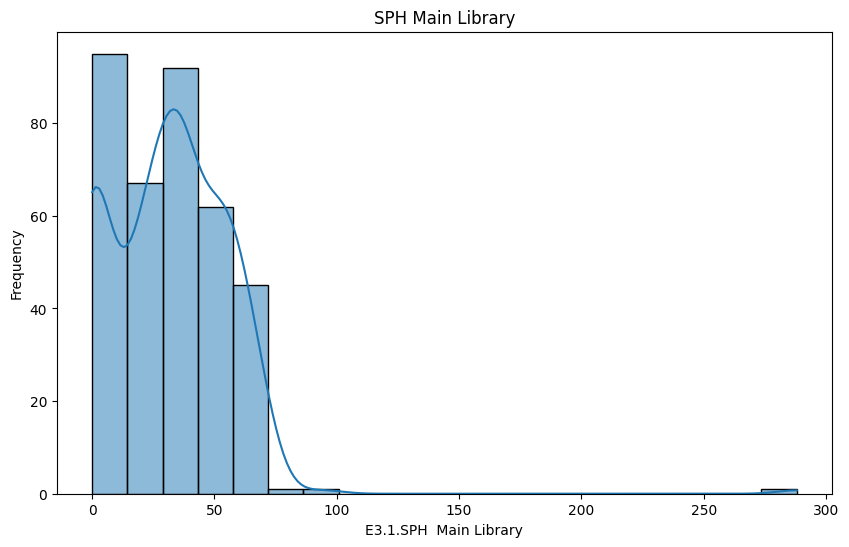

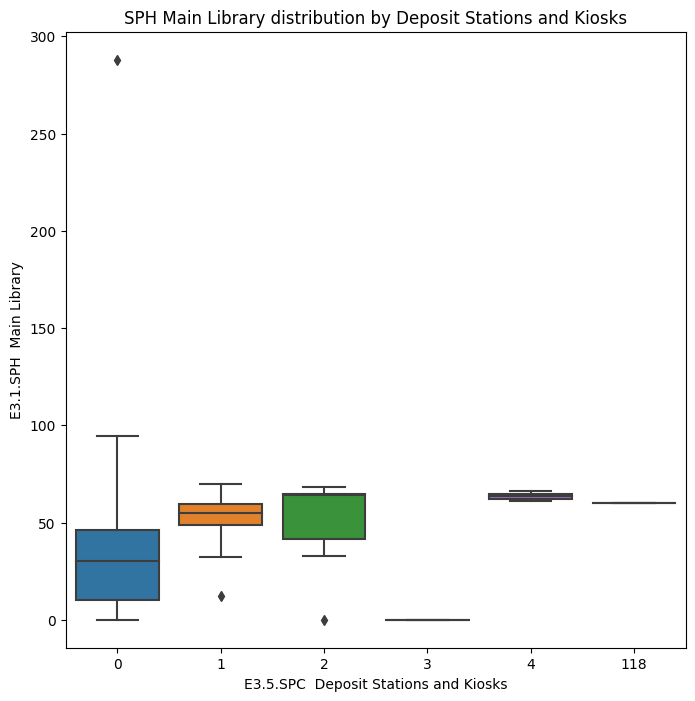

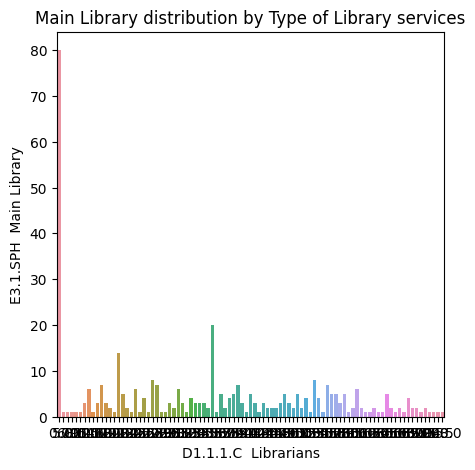

In [8]:
data_types = df.dtypes
print("\nData Types:")
print(data_types)
print(df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['E3.1.SPH  Main Library'], bins=20, kde=True)
plt.title('SPH Main Library')
plt.xlabel('E3.1.SPH  Main Library')
plt.ylabel('Frequency')
plt.show()

# Visualization - SPH Main Library distribution by Type of Library services
plt.figure(figsize=(8, 8))
sns.boxplot(y='E3.1.SPH  Main Library', x='E3.5.SPC  Deposit Stations and Kiosks (refer to criteria)', data=df)
plt.title('SPH Main Library distribution by Deposit Stations and Kiosks')
plt.ylabel('E3.1.SPH  Main Library')
plt.xlabel('E3.5.SPC  Deposit Stations and Kiosks')
plt.show()

# Visualization 
plt.figure(figsize=(5, 5))
sns.countplot(x='E3.1.SPH  Main Library', data=df)
plt.title('Main Library distribution by Type of Library services')
plt.xlabel('D1.1.1.C  Librarians')
plt.ylabel('E3.1.SPH  Main Library')
plt.show()

TASK 3

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)



Missing Values:
Library Full Name                                      0
Library Number                                         0
Survey Year From                                       0
A1.3 Ontario Library Service (OLS) Region (English)    0
A1.4 Type of Library Service (English)                 0
                                                      ..
P1.1  Resident Population Served                       0
P1.2  Contracting Population Served                    0
P2.1  Contracting Households Served                    0
P2.2  Resident Households Served                       0
Unnamed: 328                                           0
Length: 329, dtype: int64


In [5]:
from scipy.stats import zscore

# Calculate the Z-score for numeric columns
z_scores = df.select_dtypes(include=['int64', 'float64']).apply(zscore)

# Define a threshold for outliers (e.g., Z-score > 3 or < -3)
outlier_threshold = 3

# Remove rows with outlier values for each numeric column
df_no_outliers = df[(z_scores.abs() < outlier_threshold).all(axis=1)]

In [6]:

# Example: Perform one-hot encoding for a categorical variable
df = pd.get_dummies(df, columns=['A1.4 Type of Library Service (English)'])

# Example: Apply log transformation on a skewed numeric feature
import numpy as np
df['log_transformed_column'] = np.log(df['E3.1.SPH  Main Library'] + 1)

TASK 4

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features and target variable
X = df.drop('E3.1.SPH  Main Library', axis=1)
y = df['E3.1.SPH  Main Library']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Support Vector Machine (SVM) Classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Predict using SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
print("Support Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


ValueError: could not convert string to float: 'Merrickville-Wolford'

Task 5

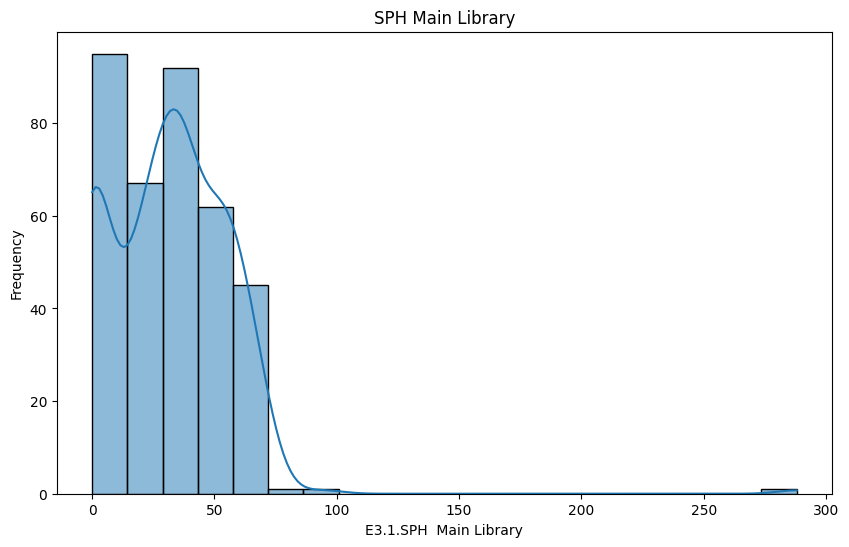

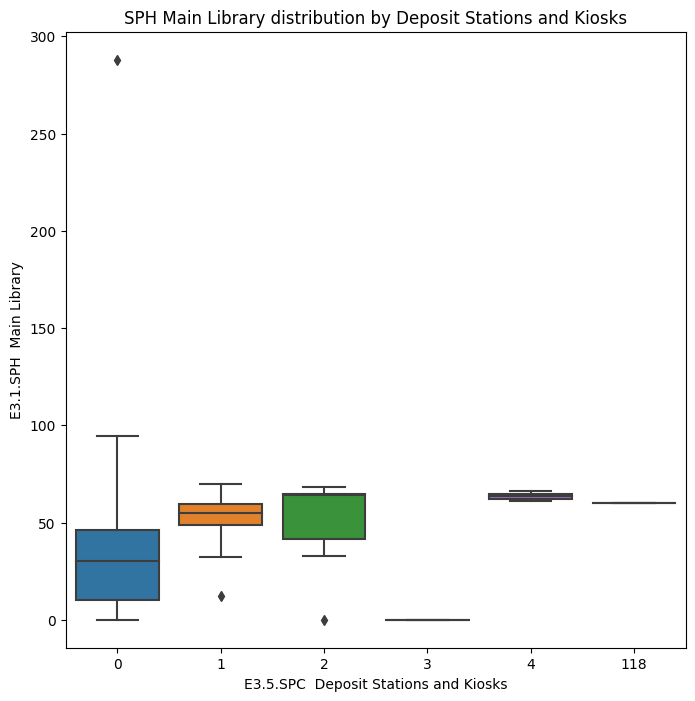

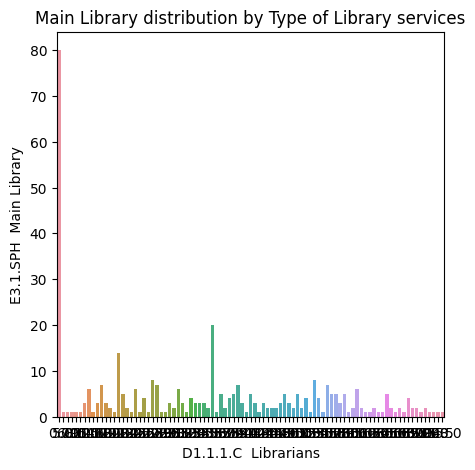

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['E3.1.SPH  Main Library'], bins=20, kde=True)
plt.title('SPH Main Library')
plt.xlabel('E3.1.SPH  Main Library')
plt.ylabel('Frequency')
plt.show()

# Visualization 
plt.figure(figsize=(8, 8))
sns.boxplot(y='E3.1.SPH  Main Library', x='E3.5.SPC  Deposit Stations and Kiosks (refer to criteria)', data=df)
plt.title('SPH Main Library distribution by Deposit Stations and Kiosks')
plt.ylabel('E3.1.SPH  Main Library')
plt.xlabel('E3.5.SPC  Deposit Stations and Kiosks')
plt.show()

# Visualization 
plt.figure(figsize=(5, 5))
sns.countplot(x='E3.1.SPH  Main Library', data=df)
plt.title('Main Library distribution by Type of Library services')
plt.xlabel('D1.1.1.C  Librarians')
plt.ylabel('E3.1.SPH  Main Library')
plt.show()